# Análise e Detecção de Fraudes em Cartão de Crédito
_por [Gabriel Penha]_

---


## 1. Problema de negócio

Este projeto foca na detecção de transações fraudulentas em cartões de crédito, um desafio crítico para instituições financeiras. O objetivo é construir um modelo de Machine Learning capaz de identificar fraudes com alta precisão e recall, minimizando as perdas financeiras (Falsos Negativos) e o impacto negativo na experiência do cliente (Falsos Positivos).


### 1.2. Fonte dos Dados

O dataset utilizado é o "Credit Card Fraud Detection" disponível no Kaggle. Ele contém transações europeias anonimizadas que ocorreram durante dois dias em setembro de 2013. A principal característica do dataset é o seu extremo desbalanceamento, com apenas 0.172% das transações sendo fraudulentas.

[Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## 2. Análise Exploratória de Dados (EDA)

Nesta seção, vamos investigar os dados para entender seus padrões, distribuição e principais características.

In [ ]:
#Fazendo a importação do banco e instalando alguns pacotes iniciais
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
#Dando uma primeira olhada nos dados

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Checando os formatos e quantidade de dados faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Foi confirmado que os dados são desbalanceados (a target feature apresenta uma classe minoritária de **0,17%**), não apresentam dados ausentes e as features _V1 até V28_ não apresentam qualquer chance de interpretação, como são frutos de um PCA. A feature **Amount** apresenta um calda longa à direita e a interpretabilidade da **Time** é difícil devido aos grandes valores nela. Dessa forma, após a separação do banco em treino/validação/teste iremos converter a variável **Time** de segundos para horas, com o objetivo de melhorar a interpretabilidade de sua distribuição.

Visualização do comportamento das features Time, Amount e Class.

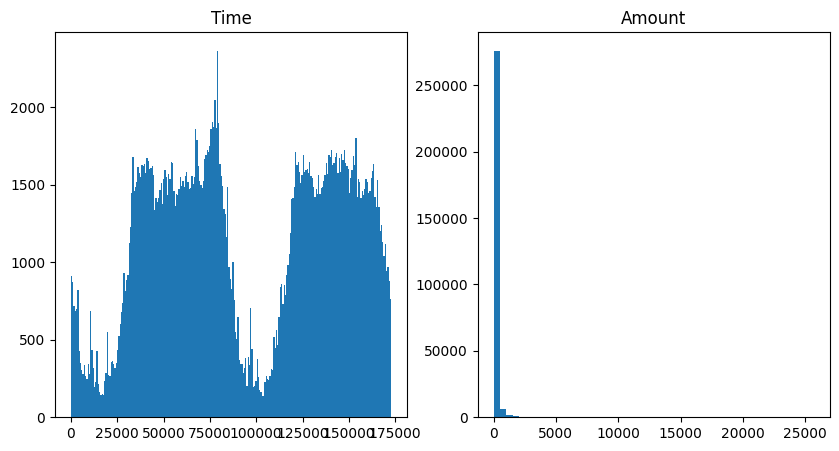

In [ ]:
#Plotando os histogramas da Time e Amount
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df['Time'], bins=250)
plt.title('Time')

plt.subplot(1,2,2)
plt.hist(df['Amount'], bins=50)
plt.title('Amount')

plt.show()

É visivel que a feature **Time** parece apresentar diferentes grupos dentro da distribuição, possuindo 3 picos. Talvez uma relação com a feature target. Além disso, a **Amount** apresenta realmente uma calda muito pesada, sendo necessário aplicar uma transformação logarítmica depois.

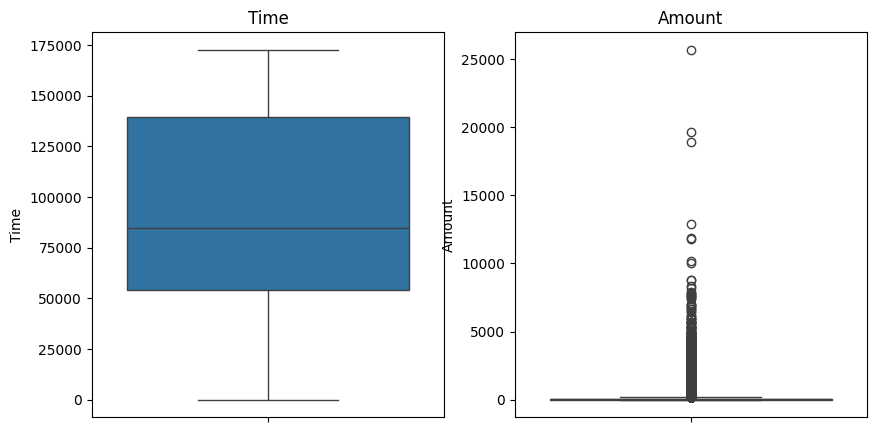

In [ ]:
#Plotando os boxplots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df['Time'])
plt.title('Time')

plt.subplot(1,2,2)
sns.boxplot(df['Amount'])
plt.title('Amount')
plt.show()

A feature Time apresenta uma assimitria à esquerda, o que não fica tão visivel no histograma devido a seus altos e baixos. A feature Amount apresenta muitos valores àtipicos, muito acima de 75% das demais observações, porém por se tratar de valor financeiros talvez sejam exemplos de super-ricos e não de anomalias.

O próximo passo é visualizar como essas variáveis se comportam em relação a target.

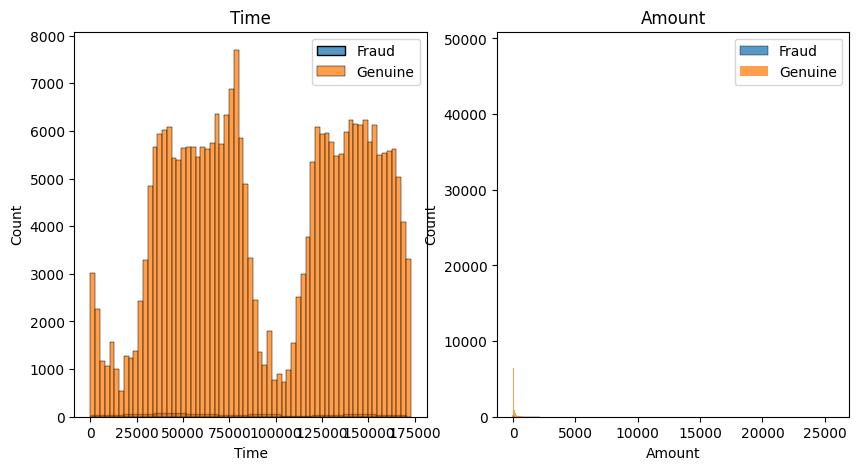

In [ ]:
#Ploting histograns with target

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df[df['Class']==1]['Time'], label='Fraud')
sns.histplot(df[df['Class']==0]['Time'], label='Genuine')
plt.legend()
plt.title('Time')

plt.subplot(1,2,2)
sns.histplot(df[df['Class']==1]['Amount'], label='Fraud')
sns.histplot(df[df['Class']==0]['Amount'], label='Genuine')
plt.legend()
plt.title('Amount')

plt.show()

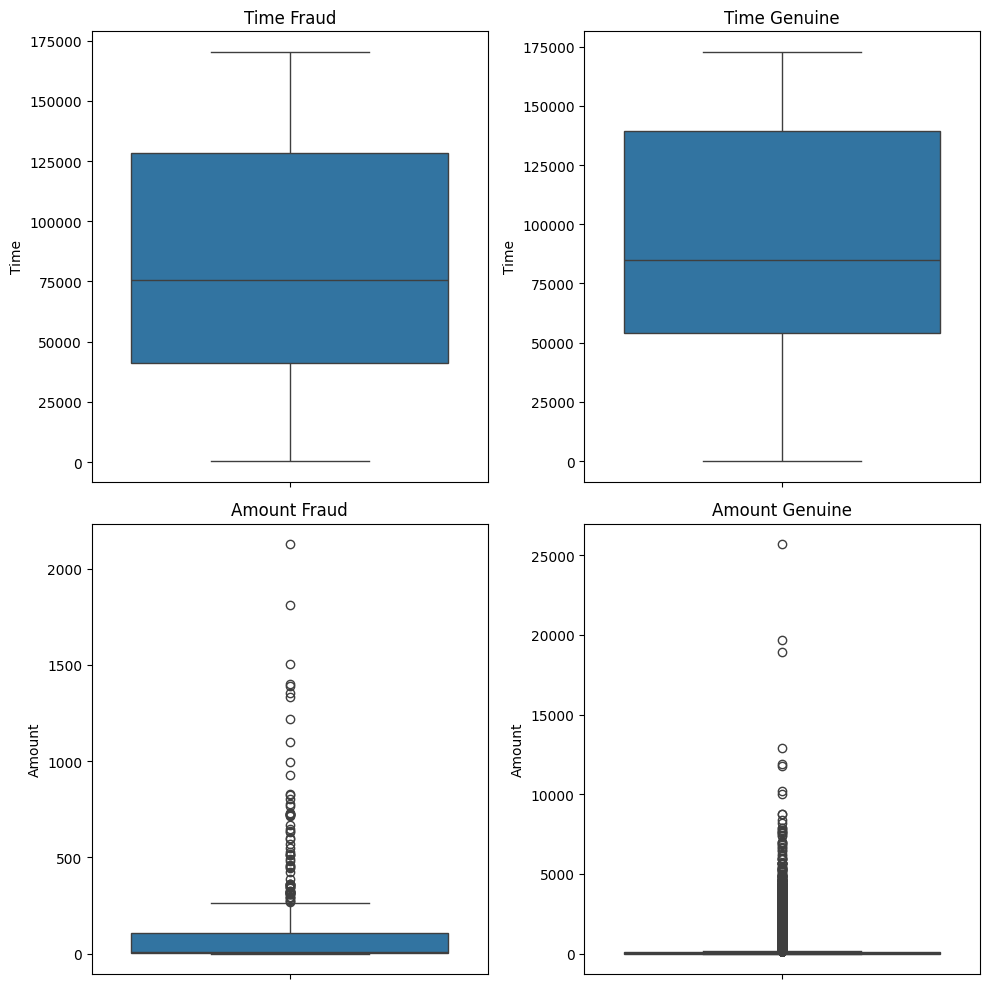

In [ ]:
#Ploting boxplots with target

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df[df['Class'] == 1]['Time'])
plt.title('Time Fraud')

plt.subplot(2, 2, 2)
sns.boxplot(y=df[df['Class'] == 0]['Time'])
plt.title('Time Genuine')

plt.subplot(2, 2, 3)
sns.boxplot(y=df[df['Class'] == 1]['Amount'])
plt.title('Amount Fraud')

plt.subplot(2, 2, 4)
sns.boxplot(y=df[df['Class'] == 0]['Amount'])
plt.title('Amount Genuine')

plt.tight_layout()
plt.show()

Pelos boxplots fica é possível supor que a distribuição tri-modal da variável **Time** não está diretamente relacionada com a Target, podendo ser reflexo de um padrão de compra devido ao horário do dia. Também fica visivel que a distribuição da **Amount** é pesada também para os casos de fraude, mas os valores são muito menores que os globais.

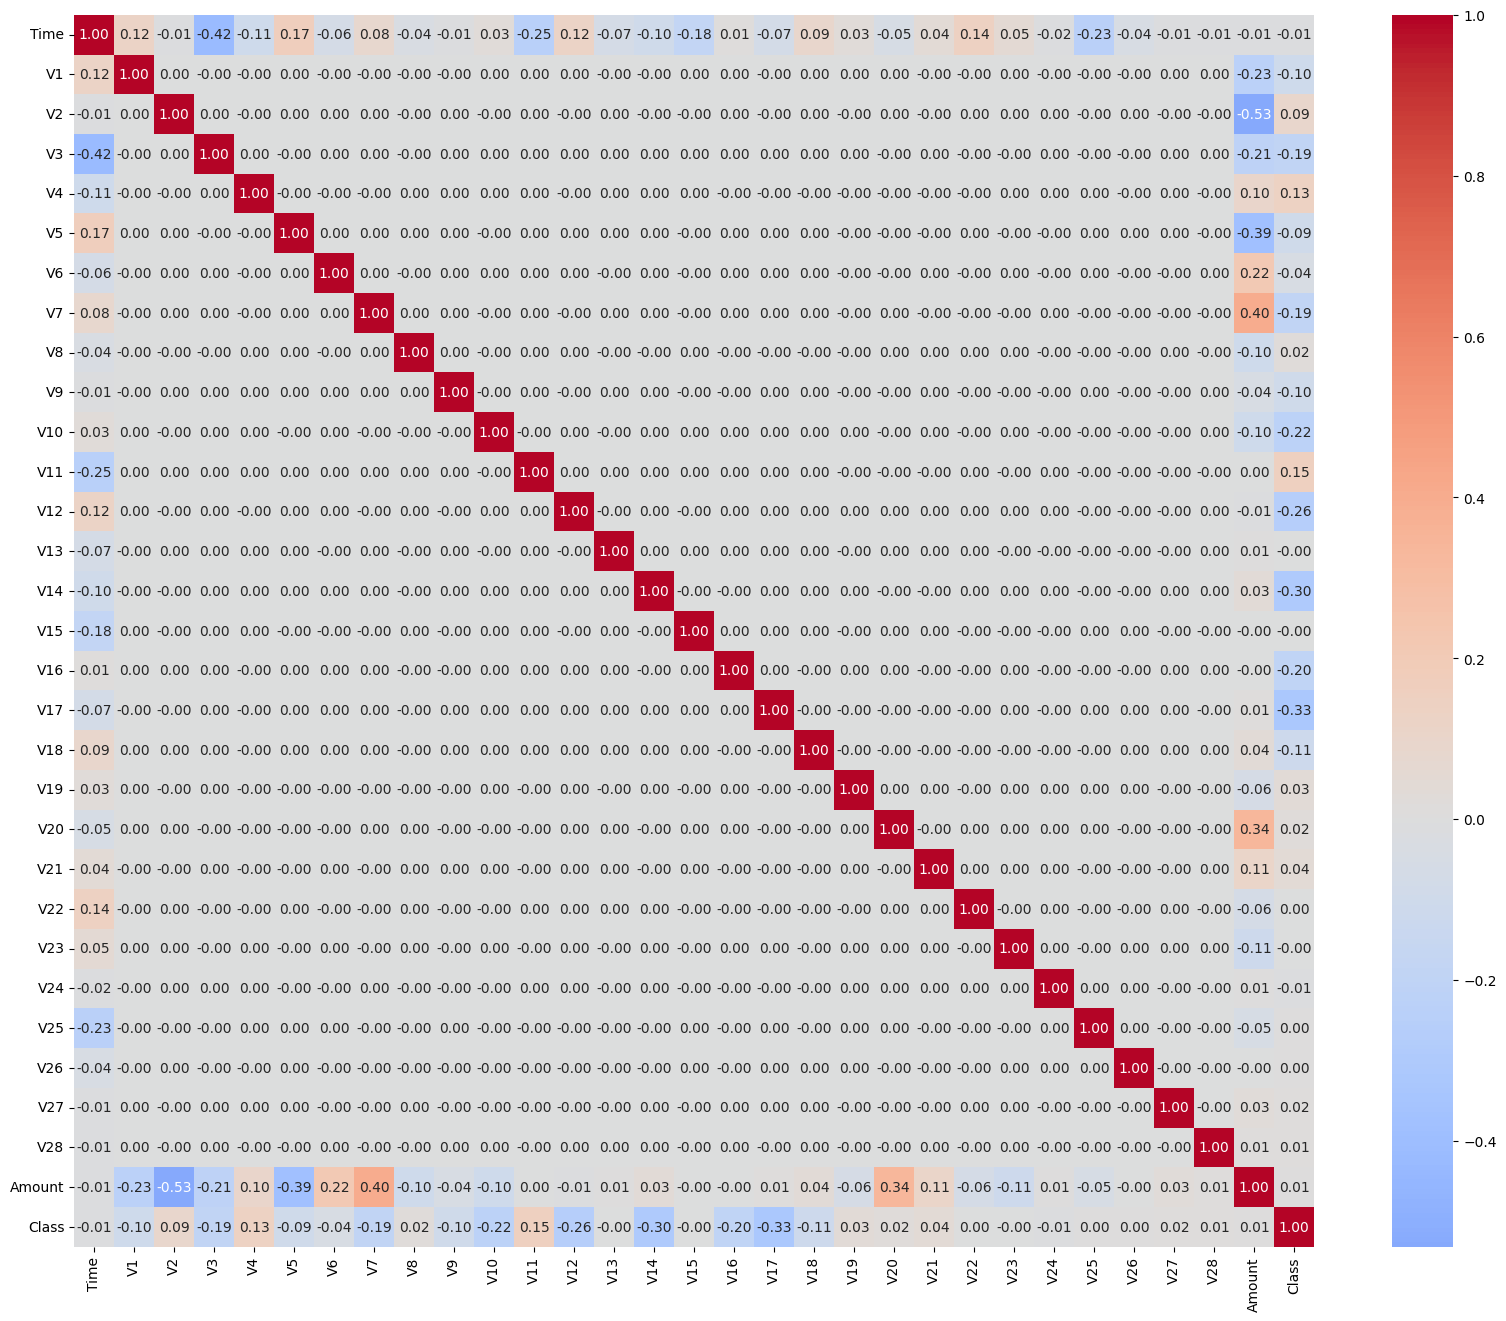

In [ ]:
#Correlation Matrix
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.show()

In [ ]:
import plotly.express as px
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='RdBu', range_color=[-1,1])
fig.show()

Como já era esperado, as features fruto de PCA não apresentam correlações entre si, mas algumas delas também apresentam correlações muito baixas com a Target.


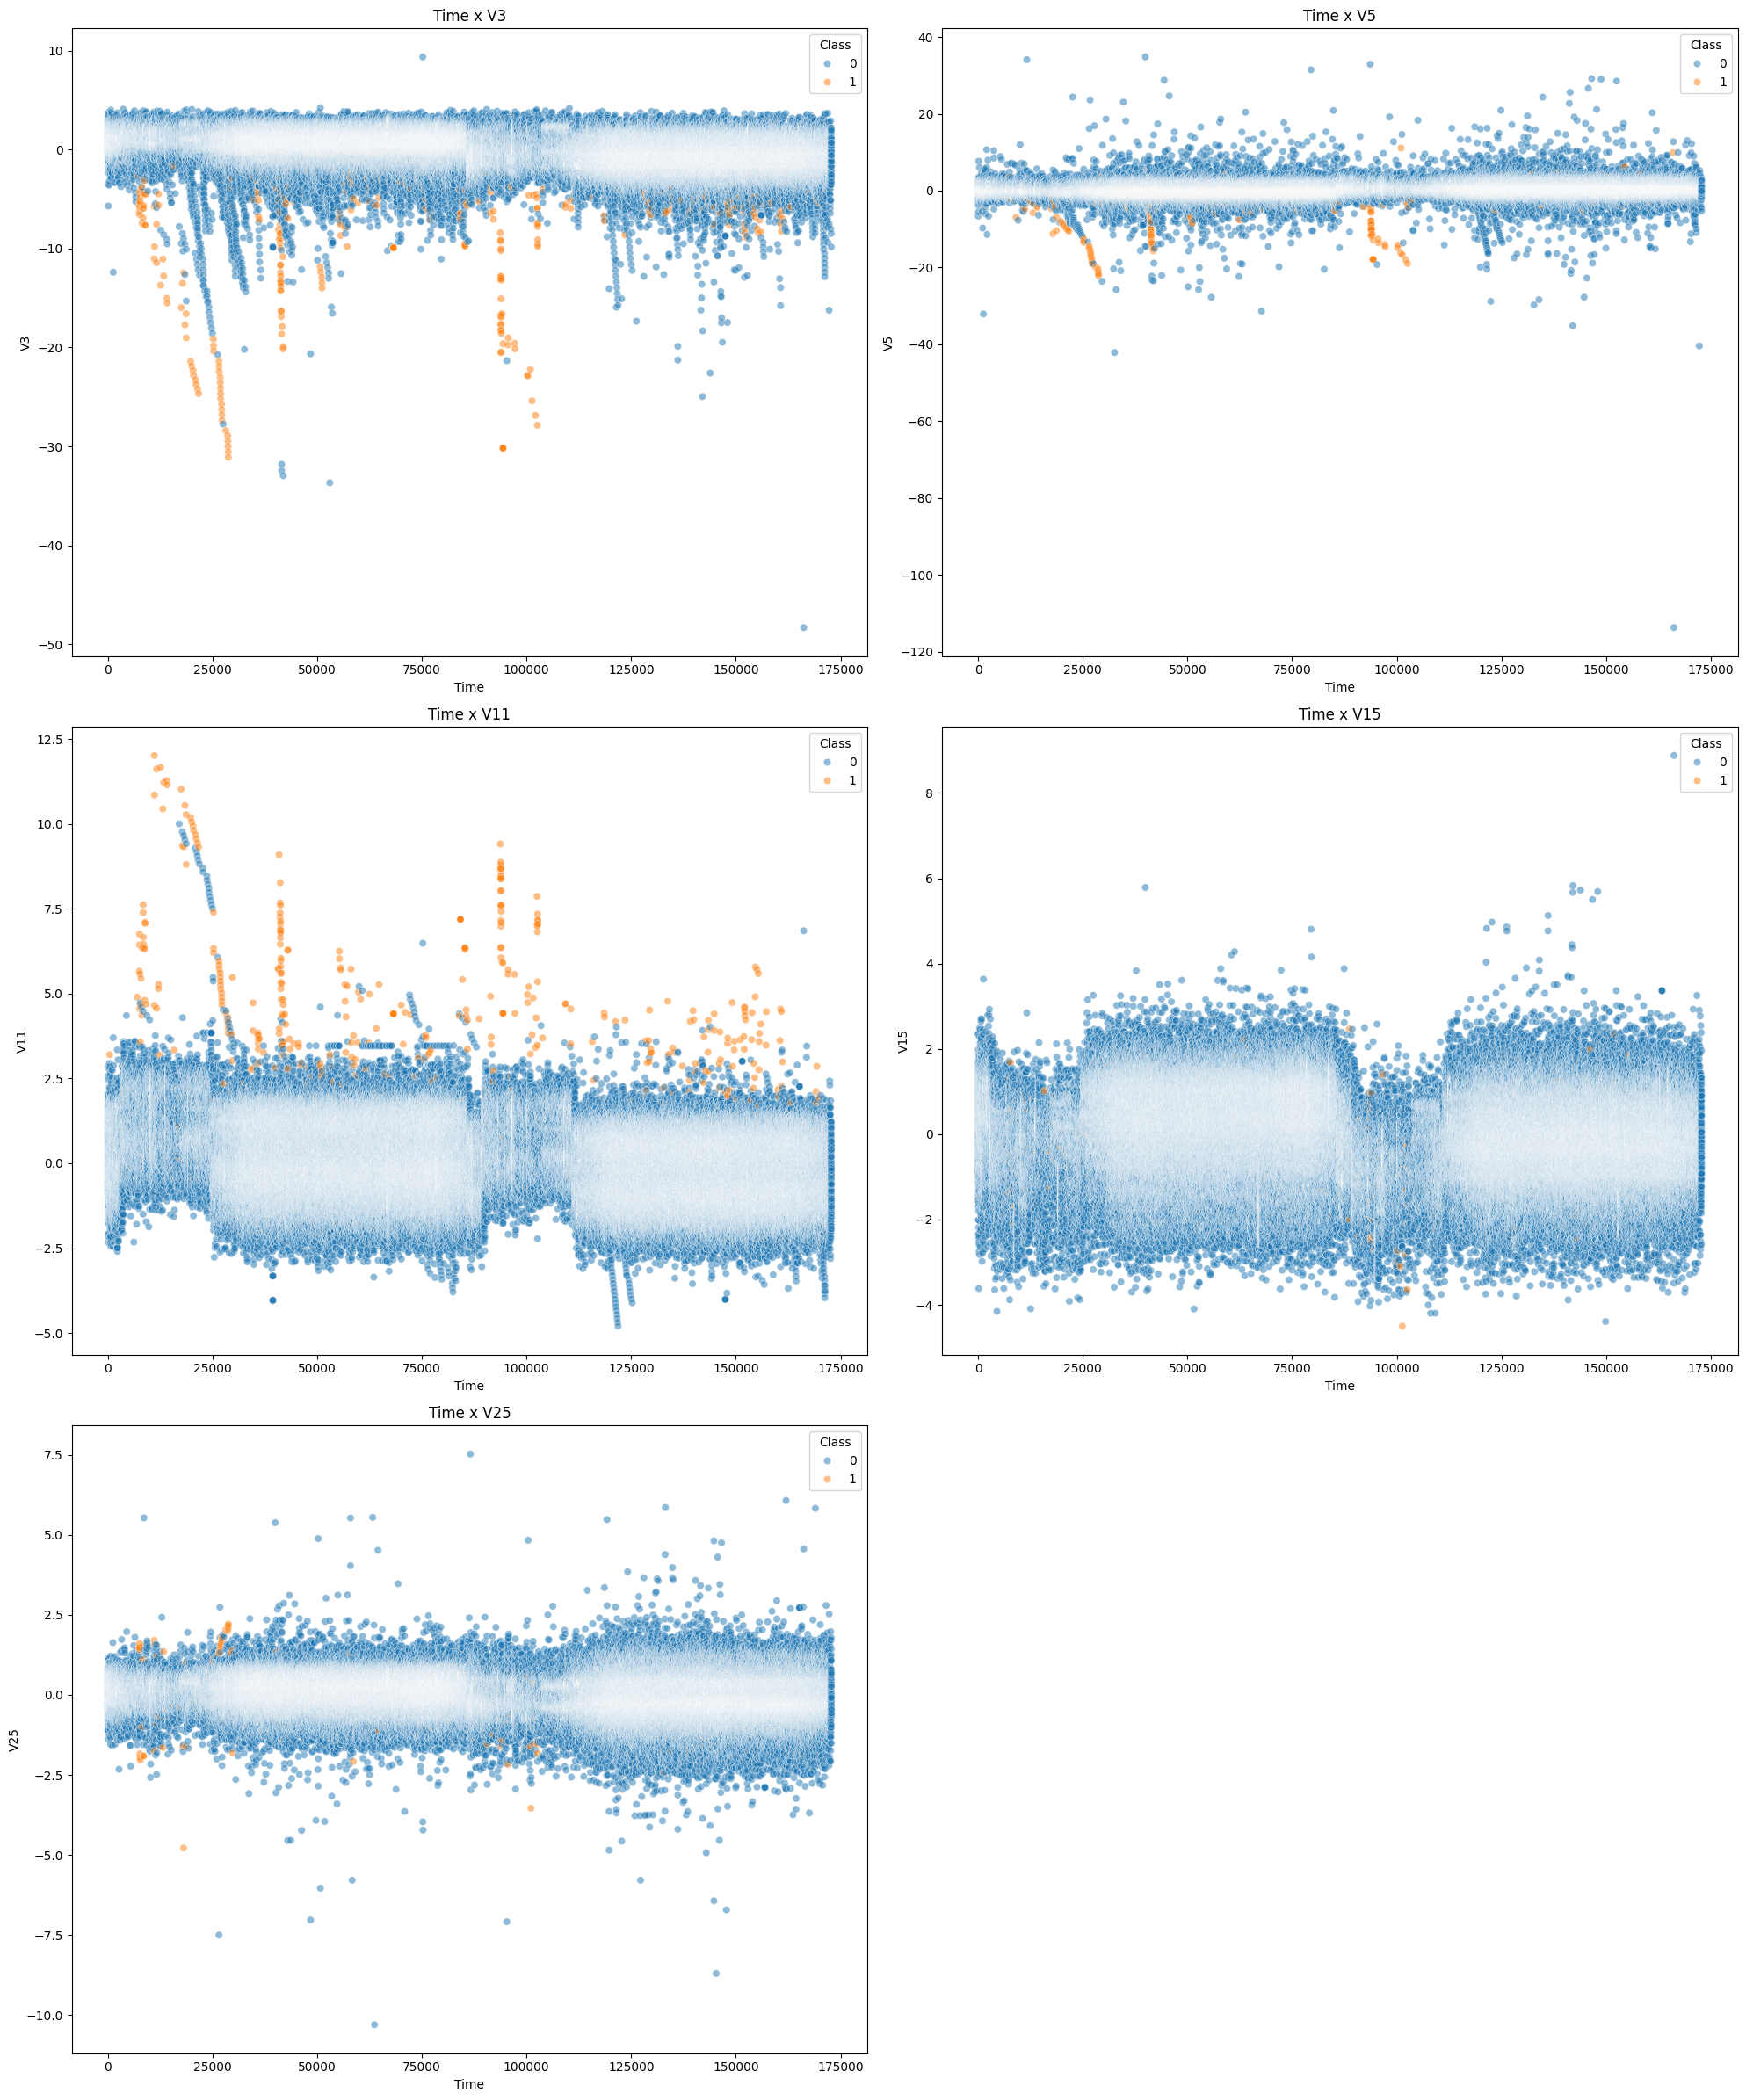

In [ ]:
#Ploting Scaterplot Time x PCA's Features (V1 - V28)

# Get the correlation of 'Time' with all other features
time_correlation = correlation_matrix['Time'].abs()

# Filter features with correlation >= 0.15 (excluding 'Time' itself)
highly_correlated_features = time_correlation[time_correlation >= 0.15].index.tolist()
highly_correlated_features.remove('Time')

# Determine the number of subplots needed
n_features = len(highly_correlated_features)
n_cols = 2  # You can adjust the number of columns as needed
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(10 * n_cols, 8 * n_rows))

for i, feature in enumerate(highly_correlated_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df['Time'], y=df[feature], hue=df['Class'], alpha=0.5)
    plt.title(f'Time x {feature}')

plt.tight_layout()
plt.show()

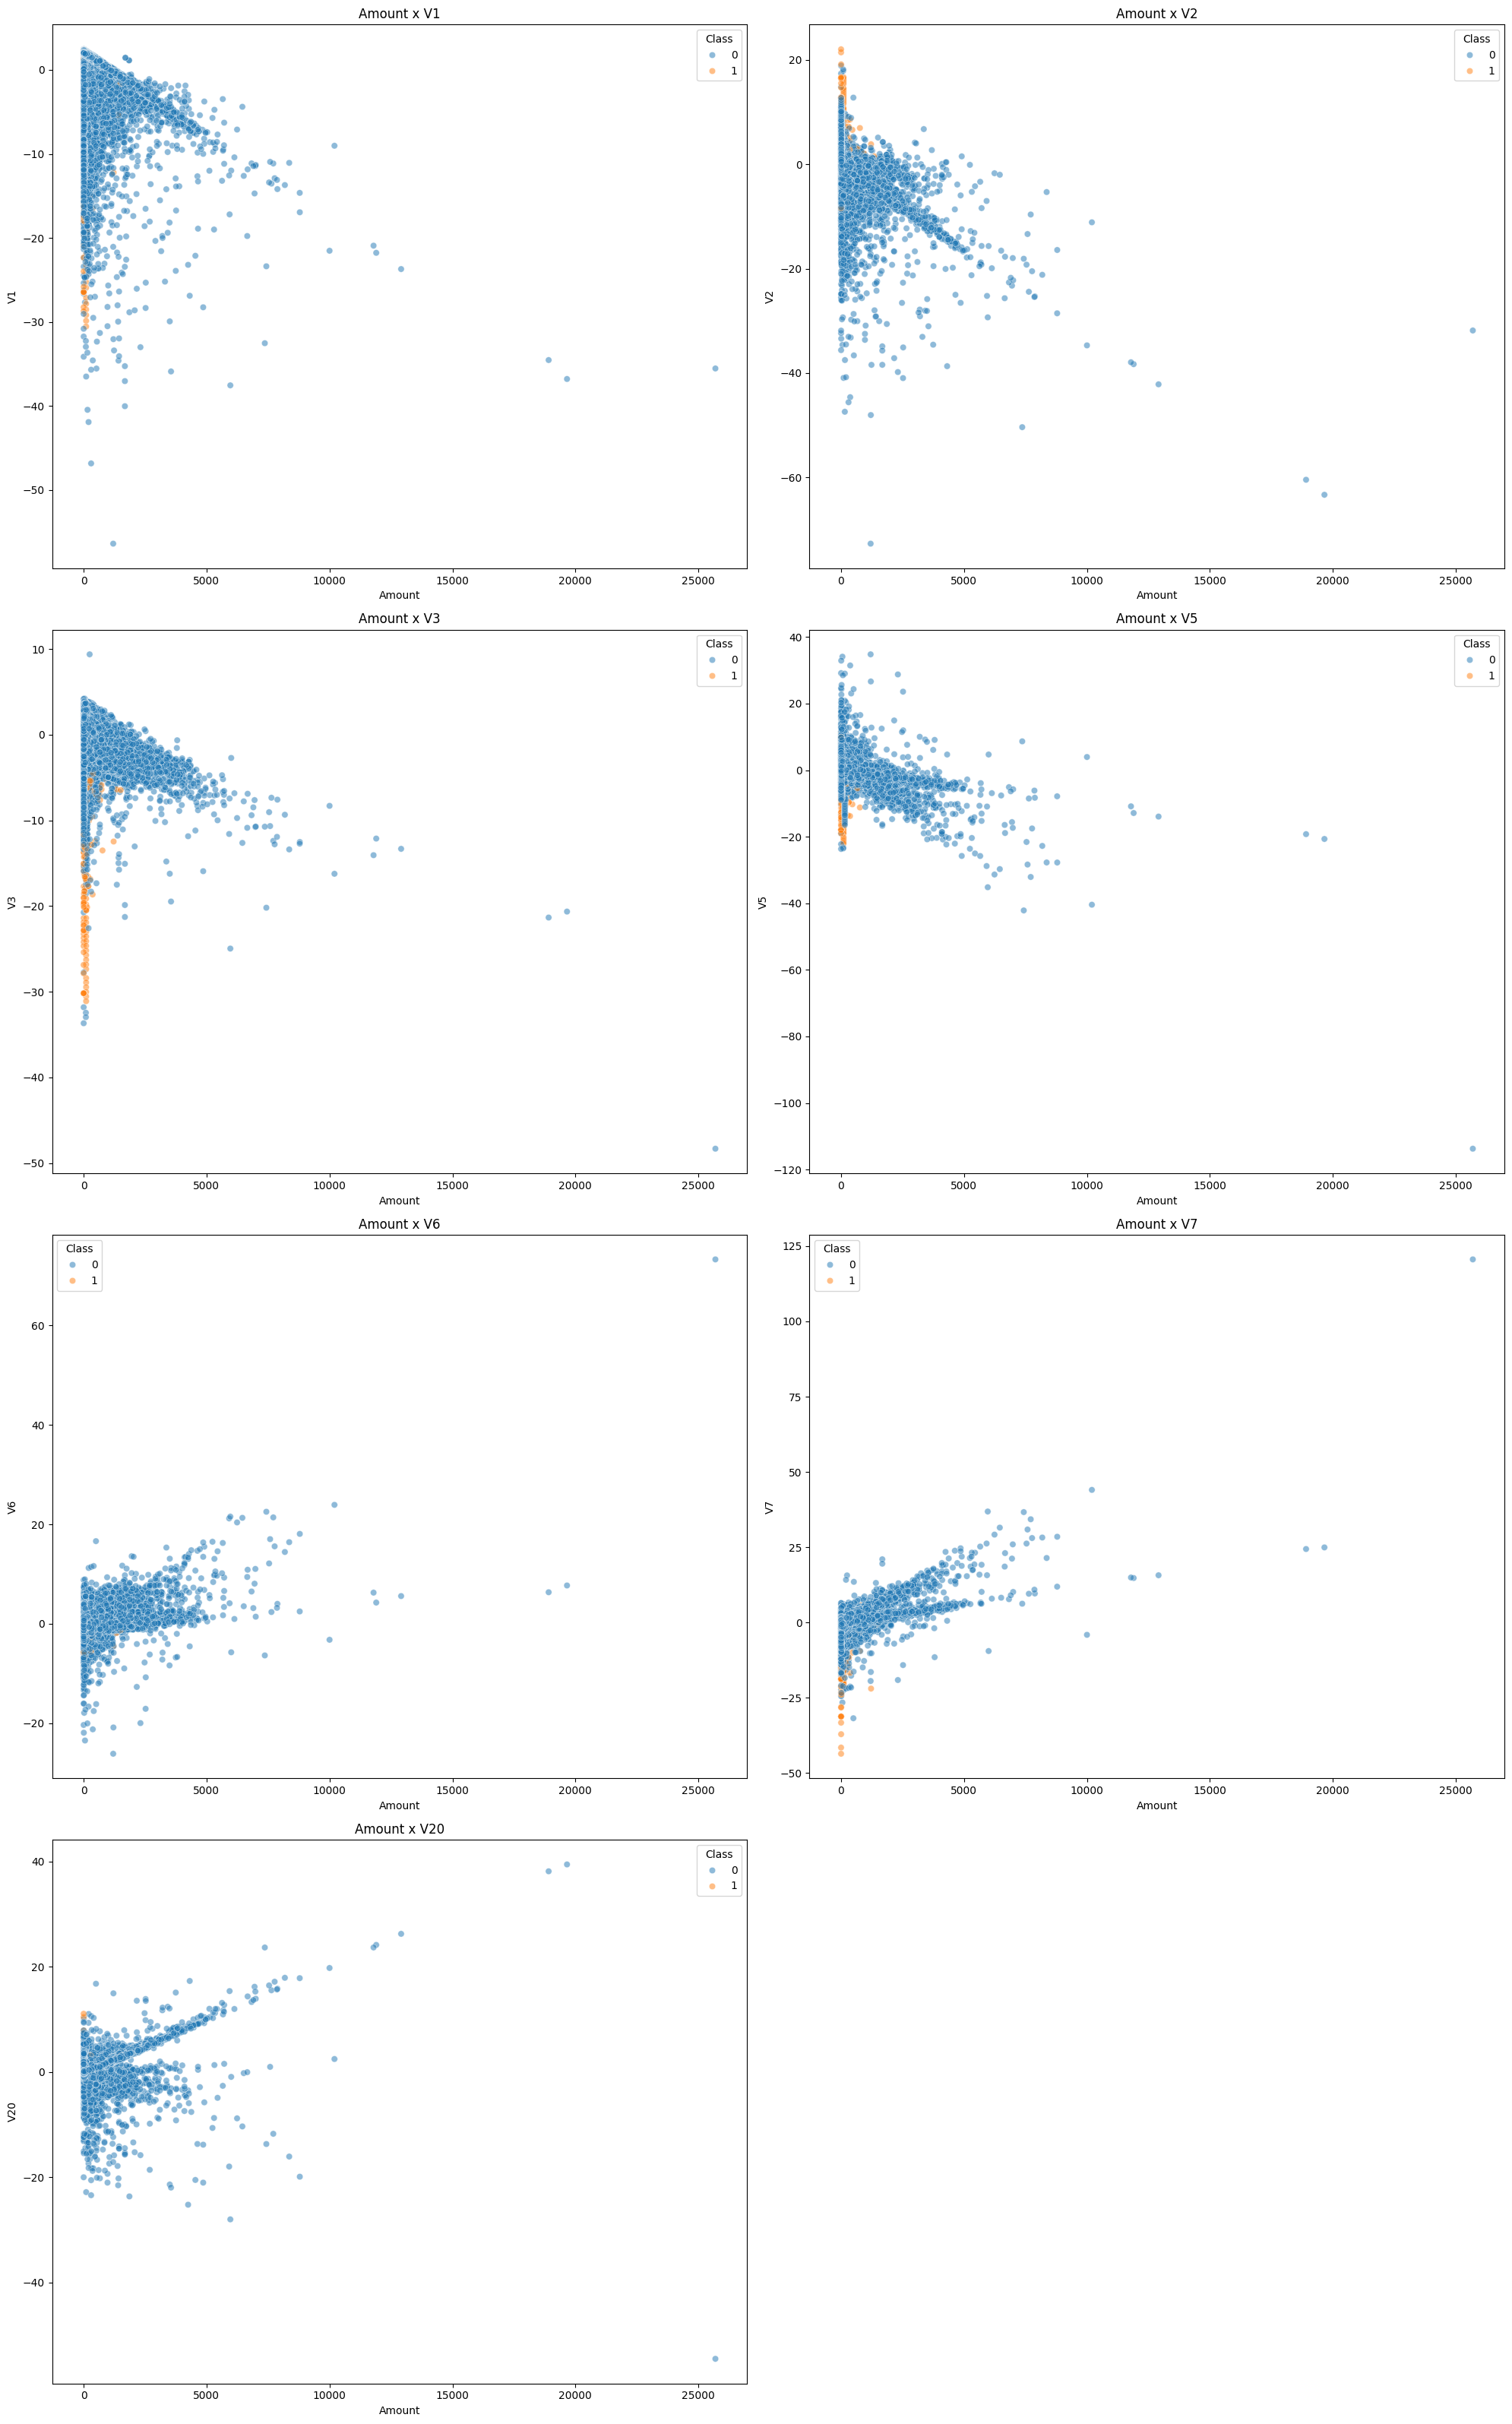

In [ ]:
#Ploting Scaterplot Amount x PCA's Features (V1 - V28)

# Get the correlation of 'Amount' with all other features
amount_correlation = correlation_matrix['Amount'].abs()

# Filter features with correlation >= 0.15 (excluding 'Amount' itself)
highly_correlated_features2 = amount_correlation[amount_correlation >= 0.15].index.tolist()
highly_correlated_features2.remove('Amount')

# Determine the number of subplots needed
n_features2 = len(highly_correlated_features2)
n_cols2 = 2  # You can adjust the number of columns as needed
n_rows2 = (n_features2 + n_cols2 - 1) // n_cols2

plt.figure(figsize=(10 * n_cols2, 8 * n_rows2))

for i, feature in enumerate(highly_correlated_features2):
    plt.subplot(n_rows2, n_cols2, i + 1)
    sns.scatterplot(x=df['Amount'], y=df[feature], hue=df['Class'], alpha=0.5)
    plt.title(f'Amount x {feature}')

plt.tight_layout()
plt.show()

## 3. Tratamento e Divisão

### 3.1 Divisão da base

In [ ]:
#Dividindo em Treino-Teste-Validação
#Levando em conta os dados desbalanceados, usaremos o StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(columns=['Class'])
y = df['Class']

# Definir o StratifiedShuffleSplit
# O n_splits=1 garante que vamos fazer a divisão uma vez.
# test_size e train_size indicam a porcentagem para os respectivos conjuntos.
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, train_size=0.6, random_state=42)

# Dividir em treino e teste
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Agora, fazemos uma nova divisão dentro de X_train e y_train para criar o conjunto de validação
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.33, train_size=0.67, random_state=42)

# Divisão para treino e validação
for train_index, val_index in sss_val.split(X_train, y_train):
    X_train_final, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_final, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

# Agora temos:
# X_train_final, y_train_final para treino
# X_val, y_val para validação
# X_test, y_test para teste

# Você pode verificar o tamanho de cada conjunto
print(f"Tamanho do conjunto de treino: {len(X_train_final)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 114492
Tamanho do conjunto de validação: 56392
Tamanho do conjunto de teste: 113923


Devido a variável de interesse ser extremamente desbalanceada foi utilizado o StratifiedShuffleSplit para preservar o percentual. Também foi pensado as opções de undersample da classe majoritaria ou oversample da minoritária, mas para esse trabalho essas ideias foram descartadas.

### 3.2 Tratamento das Features

In [ ]:
# Criar a feature 'Hour' em cada um dos dataframes X
for df_split in [X_train_final, X_val, X_test]:
    df_split['Hour'] = (df_split['Time'] / 3600) % 24
    # Agora podemos dropar a coluna 'Time' original
    df_split.drop('Time', axis=1, inplace=True)

/tmp/ipython-input-2190615999.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2190615999.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2190615999.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2190615999.py:5: SettingWithCopyWarning:


A value is trying

In [ ]:
from sklearn.preprocessing import StandardScaler

# Criar uma cópia para evitar SettingWithCopyWarning
X_train_final = X_train_final.copy()
X_val = X_val.copy()
X_test = X_test.copy()

# Log transform para 'Amount'
X_train_final['Amount_log'] = np.log1p(X_train_final['Amount'])
X_val['Amount_log'] = np.log1p(X_val['Amount'])
X_test['Amount_log'] = np.log1p(X_test['Amount'])

# Dropar a coluna original
X_train_final.drop('Amount', axis=1, inplace=True)
X_val.drop('Amount', axis=1, inplace=True)
X_test.drop('Amount', axis=1, inplace=True)

# Escalonar
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val) # Usar o mesmo scaler treinado!
X_test_scaled = scaler.transform(X_test) # Usar o mesmo scaler treinado!

## 4. Treinamento e Validação

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Treinar o modelo
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_final_scaled, y_train_final)

# Fazer previsões no conjunto de validação
y_val_pred = lr_model.predict(X_val_scaled)
y_val_proba = lr_model.predict_proba(X_val_scaled)[:, 1]

# Avaliar
print("--- Baseline: Regressão Logística ---")
print(classification_report(y_val, y_val_pred))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"AUPRC: {average_precision_score(y_val, y_val_proba):.4f}") # AUPRC é a mesma coisa que Average Precision

--- Baseline: Regressão Logística ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56295
           1       0.06      0.94      0.10        97

    accuracy                           0.97     56392
   macro avg       0.53      0.96      0.55     56392
weighted avg       1.00      0.97      0.98     56392

ROC AUC: 0.9813
AUPRC: 0.7836


Como o problema é uma classificação binaria (Fraude ou Não Fraude), foi definido o modelo baseline como uma regressão logística. Além disso, devido a natureza desbalanceada das classes, foi adicionado o parâmetro de penalidade, fazendo com que os erros na classe minoritária fossem mais punidos do que na classe majoritária.

Com isso, o modelo está com alto recall, detectando 94% das fraudes. Porém com um precisão muito baixa (6%). Ou seja, a cada 100 alertas de fraude apenas 6, aproximadamente, eram realmente fraudes.

Isso seria um grande problema.

In [ ]:
import xgboost as xgb

# Treinar o modelo
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_final_scaled, y_train_final)

# Fazer previsões no conjunto de validação
y_val_pred_xgb = xgb_model.predict(X_val_scaled)
y_val_proba_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]

# Avaliar
print("\n--- Modelo Avançado: XGBoost ---")
print(classification_report(y_val, y_val_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba_xgb):.4f}")
print(f"AUPRC: {average_precision_score(y_val, y_val_proba_xgb):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[20:06:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





--- Modelo Avançado: XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56295
           1       0.00      0.00      0.00        97

    accuracy                           1.00     56392
   macro avg       0.50      0.50      0.50     56392
weighted avg       1.00      1.00      1.00     56392

ROC AUC: 0.2580
AUPRC: 0.0017


Aqui fica visível que ao treinar o XGB sem determinar um parâmetro de peso ele tentou máximizar a acurácia do modelo. Dessa forma, ele está classificando toda transação como não fraudulenta.

In [ ]:
# Calcular o scale_pos_weight
# Use os dados de treino para o cálculo!
count_neg = y_train_final.value_counts()[0]
count_pos = y_train_final.value_counts()[1]
scale_pos_weight_value = count_neg / count_pos

print(f"Valor do scale_pos_weight: {scale_pos_weight_value:.2f}")

# Exemplo de cálculo: Se tivermos 1000 negativos e 10 positivos, o valor será 100.

Valor do scale_pos_weight: 577.24


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, average_precision_score

# Recalculando o scale_pos_weight com os dados de treino
count_neg, count_pos = y_train_final.value_counts()
scale_pos_weight_value = count_neg / count_pos

# Treinar o modelo OTIMIZADO
xgb_model_tuned = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value  # <-- A MÁGICA ACONTECE AQUI
)

xgb_model_tuned.fit(X_train_final_scaled, y_train_final)

# Fazer previsões no conjunto de validação
y_val_pred_xgb_tuned = xgb_model_tuned.predict(X_val_scaled)
y_val_proba_xgb_tuned = xgb_model_tuned.predict_proba(X_val_scaled)[:, 1]

# Avaliar
print("\n--- Modelo Otimizado: XGBoost com scale_pos_weight ---")
print(classification_report(y_val, y_val_pred_xgb_tuned))
print(f"AUPRC: {average_precision_score(y_val, y_val_proba_xgb_tuned):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[20:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





--- Modelo Otimizado: XGBoost com scale_pos_weight ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56295
           1       0.85      0.84      0.84        97

    accuracy                           1.00     56392
   macro avg       0.93      0.92      0.92     56392
weighted avg       1.00      1.00      1.00     56392

AUPRC: 0.8532


Após fazer o ajuste da penalidade aplicada ao modelo, o novo modelo perdeu um pouco do recall para fraudes em relação a baseline (-10%), porém melhorou substancialmente a precisão (de 6% para 85%).

Desse forma, esse modelo apresentou melhor trade-off e será o que seguirá para teste.

##5. Teste

In [ ]:
# Fazer previsões no conjunto de TESTE com o modelo campeão
y_test_pred = xgb_model_tuned.predict(X_test_scaled)
y_test_proba = xgb_model_tuned.predict_proba(X_test_scaled)[:, 1]

# Avaliar
print("\n--- PERFORMANCE FINAL NO CONJUNTO DE TESTE ---")
print(classification_report(y_test, y_test_pred))
print(f"AUPRC Final: {average_precision_score(y_test, y_test_proba):.4f}")


--- PERFORMANCE FINAL NO CONJUNTO DE TESTE ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.87      0.80      0.83       197

    accuracy                           1.00    113923
   macro avg       0.93      0.90      0.92    113923
weighted avg       1.00      1.00      1.00    113923

AUPRC Final: 0.8345


O resultado do teste demostra um modelo que aprendeu perfeitamente as transações legítimas (não classificando nenhuma como fraude), ao mesmo tempo que teve um bom desempenho em relação as fraudes.

Ao olharmos para as fraudes: 80% delas foram detectadas e 87% das vezes que o modelo acusou uma transação como fraudulenta, ela realmente era.